<a href="https://colab.research.google.com/github/mbolding/Psychophysics/blob/master/flash_lag_effect_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analysis of Control and Experimental Group Study

## Overview
 The dataset "Data Analyzation.xlsx" contains measurements from 30 participants (15 control, 15 experimental) with the following key characteristics:

- **Control Group**: Measured at 3 stages (Stage 1, 2, and 3)
- **Experimental Group**: Measured at 2 stages (Stage 1 and 3, with Stage 2 omitted)
- **Key Metric**: Delta (Δ) - the change in values from Stage 1 to Stage 3

## Analysis Components

1. **Data Import and Preparation**
   - Loading and cleaning the Excel dataset
   - Separating control and experimental groups
   - Converting data to appropriate types for analysis

2. **Box and Whisker Plots**
   - Visual comparison of delta values between control and experimental groups
   - Distribution of changes across participants in each group

3. **Statistical Tests**
   - **Independent t-test**: Comparing delta values between control and experimental groups to detect significant differences in outcomes
   - **Variance test**: Examining if the standard deviations between groups differ significantly
   - **Paired t-test**: Analyzing the overall change from Stage 1 to Stage 3 across all participants

4. **Visualizations**
   - Distribution plots of measurements
   - Comparative charts of means and standard deviations
   - Individual trajectory plots showing participant-level changes

## Research Questions Addressed
1. Is there a significant difference in the change in response (delta) between the control and experimental groups?
2. Are the variances in outcomes comparable between groups?
3. Is there a significant overall change from Stage 1 to Stage 3 across all participants?

The following code cells implement these analyses and provide detailed statistical results with accompanying visualizations.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data from Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/FLE_Data.xlsx'
df = pd.read_excel(file_path)

# Clean up the dataframe - remove empty rows and columns
# df = df.dropna(how='all')
# df = df.dropna(axis=1, how='all')

# Separate control and experimental groups
control_group = df[2:17].copy()  # Rows for control group
experimental_group = df[20:35].copy()  # Rows for experimental group

# show all rows of df
pd.set_option('display.max_rows', None)
# print(df)

# Reset indices
control_group.reset_index(drop=True, inplace=True)
experimental_group.reset_index(drop=True, inplace=True)

# Rename columns for clarity
columns = ['Participant Name', 'Age', 'Sex', 'Participant ID',
           'Stage 1', 'Stage 2', 'Stage 3', 'Delta']
control_group.columns = columns
experimental_group.columns = columns

# Convert numeric columns to appropriate data types
numeric_cols = ['Age', 'Stage 1', 'Stage 2', 'Stage 3', 'Delta']
for col in numeric_cols:
    control_group[col] = pd.to_numeric(control_group[col], errors='coerce')
    experimental_group[col] = pd.to_numeric(experimental_group[col], errors='coerce')

# Preview the data
print("Control Group:")
print(control_group)
print("\nExperimental Group:")
print(experimental_group)

# Create a combined dataframe with a group identifier
control_group['Group'] = 'Control'
experimental_group['Group'] = 'Experimental'
all_data = pd.concat([control_group, experimental_group])


# Basic descriptive statistics
print("\nDescriptive Statistics - Control Group:")
print(control_group[['Stage 1', 'Stage 2', 'Stage 3', 'Delta']].describe())

print("\nDescriptive Statistics - Experimental Group:")
print(experimental_group[['Stage 1', 'Stage 3', 'Delta']].describe())

# The data is now ready for further analysis

Control Group:
   Participant Name   Age Sex  Participant ID  Stage 1  Stage 2  Stage 3  \
0     Participant 1  21.0   F   Participant 1        4        4        4   
1     Participant 2  20.0   F   Participant 2        5        4        2   
2     Participant 3  20.0   F   Participant 3        4        5        4   
3     Participant 4  20.0   F   Participant 4        5        4        5   
4     Participant 5  21.0   F   Participant 5        5        4        2   
5     Participant 6  21.0   F   Participant 6        3        4        4   
6     Participant 7  21.0   F   Participant 7        2        1        3   
7     Participant 8  21.0   F   Participant 8        2        2        1   
8     Participant 9  21.0   F   Participant 9        2        1        3   
9    Participant 10  21.0   F  Participant 10        4        3        2   
10   Participant 11  21.0   F  Participant 11        2        3        4   
11   Participant 12  21.0   F  Participant 12        2        1        1 

Create a box and whisker plot comparing the delta values between control and experimental groups. These plots could be prettier...

<ipython-input-25-d98ad939a09b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Delta', data=all_data, palette='Set2')


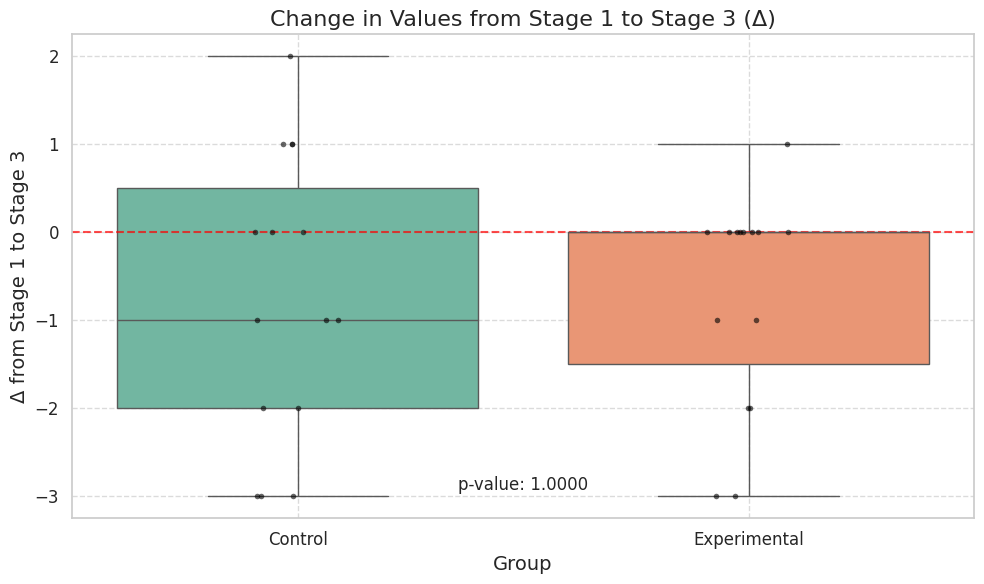

In [25]:
# create a box and whisker plot comparing the delta values between control and experimental groups
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the box and whisker plot
ax = sns.boxplot(x='Group', y='Delta', data=all_data, palette='Set2')

# Add individual data points for better visibility
sns.stripplot(x='Group', y='Delta', data=all_data, color='black', size=4, alpha=0.6)

# Customize the plot
plt.title('Change in Values from Stage 1 to Stage 3 (Δ)', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Δ from Stage 1 to Stage 3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a reference line at y=0 (no change)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add statistical comparison (optional)
# Perform t-test between groups
from scipy import stats
control_delta = control_group['Delta'].dropna()
experimental_delta = experimental_group['Delta'].dropna()
t_stat, p_value = stats.ttest_ind(control_delta, experimental_delta)

# Add the p-value to the plot
plt.text(0.5, plt.ylim()[0] * 0.9, f'p-value: {p_value:.4f}',
         horizontalalignment='center', fontsize=12)

# Enhance visuals
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.savefig('delta_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

t-test between the control and experimental group deltas. There was no significant difference between change in experimental and control group performance.


Independent Samples T-Test Results:
Control Group: Mean Delta = -0.73, SD = 1.62, n = 15
Experimental Group: Mean Delta = -0.73, SD = 1.22, n = 15
t-statistic = 0.0000
p-value = 1.0000
The difference is not statistically significant (p > 0.05).


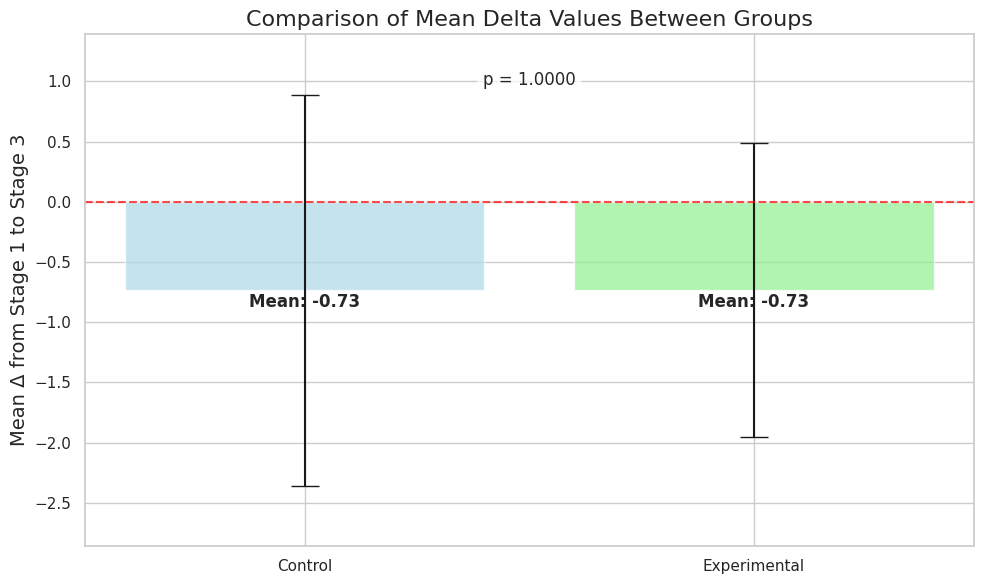

In [26]:
# t-test between the control and experimental group deltas

# Extract delta values for both groups, removing any NaN values
control_delta = control_group['Delta'].dropna()
experimental_delta = experimental_group['Delta'].dropna()

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(control_delta, experimental_delta)

# Calculate means and standard deviations for reporting
control_mean = control_delta.mean()
experimental_mean = experimental_delta.mean()
control_std = control_delta.std()
experimental_std = experimental_delta.std()

# Print the results
print("\nIndependent Samples T-Test Results:")
print(f"Control Group: Mean Delta = {control_mean:.2f}, SD = {control_std:.2f}, n = {len(control_delta)}")
print(f"Experimental Group: Mean Delta = {experimental_mean:.2f}, SD = {experimental_std:.2f}, n = {len(experimental_delta)}")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"The difference is statistically significant (p < {alpha}).")
else:
    print(f"The difference is not statistically significant (p > {alpha}).")

# Create a visualization to accompany the t-test
plt.figure(figsize=(10, 6))

# Plot means with error bars
groups = ['Control', 'Experimental']
means = [control_mean, experimental_mean]
errors = [control_std, experimental_std]

plt.bar(groups, means, yerr=errors, capsize=10, color=['lightblue', 'lightgreen'], alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add annotations
for i, (mean, group) in enumerate(zip(means, groups)):
    plt.text(i, mean + (0.1 if mean >= 0 else -0.1),
             f'Mean: {mean:.2f}', ha='center', va='center', fontweight='bold')

plt.title('Comparison of Mean Delta Values Between Groups', fontsize=16)
plt.ylabel('Mean Δ from Stage 1 to Stage 3', fontsize=14)
plt.ylim(min(min(means) - max(errors) - 0.5, -0.5), max(max(means) + max(errors) + 0.5, 0.5))
plt.annotate(f'p = {p_value:.4f}', xy=(0.5, 0.9), xycoords='axes fraction',
             ha='center', fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.tight_layout()
plt.savefig('ttest_results.png', dpi=300, bbox_inches='tight')
plt.show()

Determine if the standard deviations are significantly different. There was no significant difference between the variance in the performance change.


F-Test for Equality of Variances:
Control Group: Variance = 2.6381, SD = 1.6242, n = 15
Experimental Group: Variance = 1.4952, SD = 1.2228, n = 15
F-statistic = 1.7643
Degrees of freedom: 14, 14
p-value = 0.2999

Levene's Test for Equality of Variances:
Test statistic = 1.5734
p-value = 0.2201

There is no significant difference between the variances (p > 0.05).


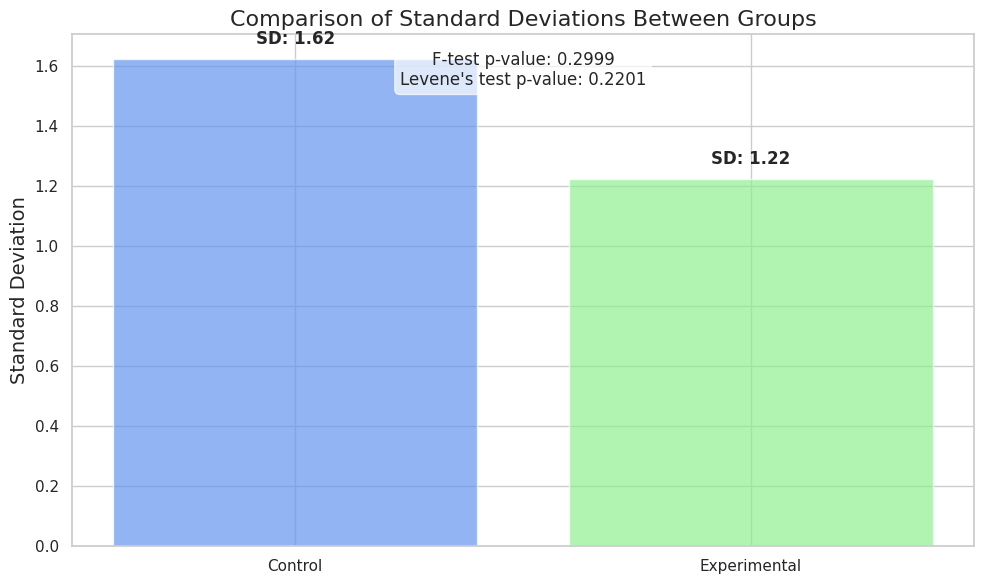

In [27]:
# determine if the standard deviations are significantly different

# Extract delta values for both groups, removing any NaN values
control_delta = control_group['Delta'].dropna()
experimental_delta = experimental_group['Delta'].dropna()

# Calculate variances (square of standard deviation)
control_var = control_delta.var()
experimental_var = experimental_delta.var()

# Calculate standard deviations
control_std = control_delta.std()
experimental_std = experimental_delta.std()

# Perform F-test for equality of variances
# The F-statistic is the ratio of the larger variance to the smaller variance
if control_var >= experimental_var:
    f_stat = control_var / experimental_var
    df1 = len(control_delta) - 1
    df2 = len(experimental_delta) - 1
else:
    f_stat = experimental_var / control_var
    df1 = len(experimental_delta) - 1
    df2 = len(control_delta) - 1

# Calculate p-value (two-tailed test)
p_value = 2 * min(1 - stats.f.cdf(f_stat, df1, df2), stats.f.cdf(f_stat, df1, df2))

# An alternative method using scipy.stats directly
f_stat_alt, p_value_alt = stats.levene(control_delta, experimental_delta)

# Print the results
print("\nF-Test for Equality of Variances:")
print(f"Control Group: Variance = {control_var:.4f}, SD = {control_std:.4f}, n = {len(control_delta)}")
print(f"Experimental Group: Variance = {experimental_var:.4f}, SD = {experimental_std:.4f}, n = {len(experimental_delta)}")
print(f"F-statistic = {f_stat:.4f}")
print(f"Degrees of freedom: {df1}, {df2}")
print(f"p-value = {p_value:.4f}")

# Print Levene's test results (more robust against non-normality)
print("\nLevene's Test for Equality of Variances:")
print(f"Test statistic = {f_stat_alt:.4f}")
print(f"p-value = {p_value_alt:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"\nThe variances are significantly different (p < {alpha}).")
else:
    print(f"\nThere is no significant difference between the variances (p > {alpha}).")

# Create a visualization to illustrate the variance comparison
plt.figure(figsize=(10, 6))

# Create a bar plot of standard deviations
groups = ['Control', 'Experimental']
stds = [control_std, experimental_std]

plt.bar(groups, stds, color=['cornflowerblue', 'lightgreen'], alpha=0.7)

# Add standard deviation values as text
for i, (std, group) in enumerate(zip(stds, groups)):
    plt.text(i, std + 0.05, f'SD: {std:.2f}', ha='center', fontweight='bold')

# Add F-test results
plt.title('Comparison of Standard Deviations Between Groups', fontsize=16)
plt.ylabel('Standard Deviation', fontsize=14)
plt.annotate(f'F-test p-value: {p_value:.4f}\nLevene\'s test p-value: {p_value_alt:.4f}',
             xy=(0.5, 0.9), xycoords='axes fraction', ha='center',
             fontsize=12, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.tight_layout()
plt.savefig('variance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Paired t-test of the stage 1 vs the stage 3 for the combined experimental and control groups. This gives a significant result.


Paired Samples T-Test Results (Stage 1 vs Stage 3):
Stage 1: Mean = 3.60, SD = 1.16
Stage 3: Mean = 2.87, SD = 1.28
Mean difference (Stage 1 - Stage 3) = 0.73
Number of pairs (n) = 30
t-statistic = 2.8435
p-value = 0.0081
Cohen's d effect size = 0.5999
The difference between Stage 1 and Stage 3 is statistically significant (p < 0.05).
Scores significantly decreased from Stage 1 to Stage 3.


<ipython-input-28-d29d1562ac3c>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y='Score', data=box_data, palette=['skyblue', 'lightgreen'])


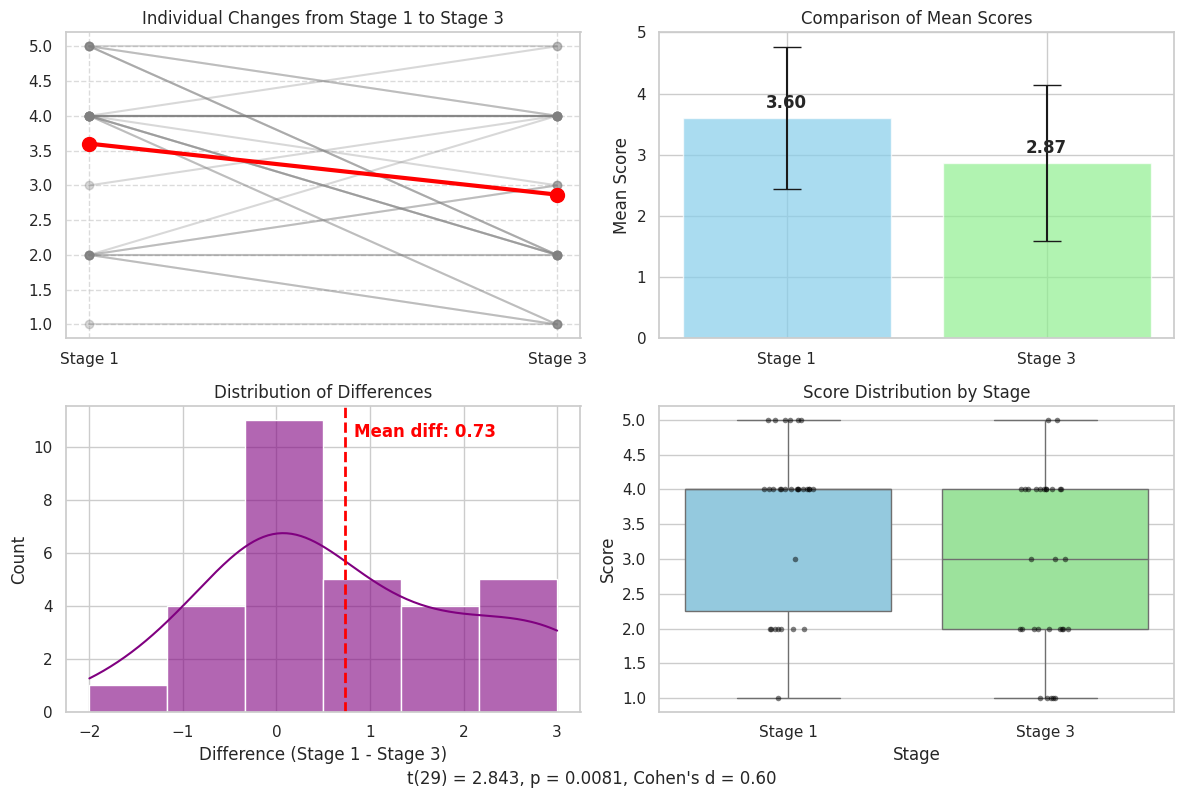

In [28]:
# a paired t-test of the stage 1 vs the stage 3 for the combined experimental and control groups

# Combine both groups for the paired analysis
all_data = pd.concat([control_group, experimental_group])

# Extract pairs of Stage 1 and Stage 3 values, removing any rows with missing data
paired_data = all_data[['Participant ID', 'Stage 1', 'Stage 3']].dropna()

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(paired_data['Stage 1'], paired_data['Stage 3'])

# Calculate descriptive statistics
stage1_mean = paired_data['Stage 1'].mean()
stage3_mean = paired_data['Stage 3'].mean()
stage1_std = paired_data['Stage 1'].std()
stage3_std = paired_data['Stage 3'].std()
mean_diff = stage1_mean - stage3_mean
n = len(paired_data)

# Calculate Cohen's d effect size
d = mean_diff / np.sqrt((stage1_std**2 + stage3_std**2) / 2)

# Print the results
print("\nPaired Samples T-Test Results (Stage 1 vs Stage 3):")
print(f"Stage 1: Mean = {stage1_mean:.2f}, SD = {stage1_std:.2f}")
print(f"Stage 3: Mean = {stage3_mean:.2f}, SD = {stage3_std:.2f}")
print(f"Mean difference (Stage 1 - Stage 3) = {mean_diff:.2f}")
print(f"Number of pairs (n) = {n}")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Cohen's d effect size = {d:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"The difference between Stage 1 and Stage 3 is statistically significant (p < {alpha}).")
    if mean_diff > 0:
        print("Scores significantly decreased from Stage 1 to Stage 3.")
    else:
        print("Scores significantly increased from Stage 1 to Stage 3.")
else:
    print(f"The difference between Stage 1 and Stage 3 is not statistically significant (p > {alpha}).")

# Create visualization
plt.figure(figsize=(12, 8))

# 1. Paired line plot showing individual changes
plt.subplot(2, 2, 1)
for i in range(len(paired_data)):
    plt.plot([1, 3], [paired_data['Stage 1'].iloc[i], paired_data['Stage 3'].iloc[i]],
             'o-', alpha=0.3, color='gray')

plt.plot([1, 3], [stage1_mean, stage3_mean], 'o-', color='red', linewidth=3, markersize=10)
plt.xticks([1, 3], ['Stage 1', 'Stage 3'])
plt.title('Individual Changes from Stage 1 to Stage 3')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Bar plot of means
plt.subplot(2, 2, 2)
bars = plt.bar(['Stage 1', 'Stage 3'], [stage1_mean, stage3_mean],
               yerr=[stage1_std, stage3_std], capsize=10,
               color=['skyblue', 'lightgreen'], alpha=0.7)
plt.ylabel('Mean Score')
plt.title('Comparison of Mean Scores')
for bar, val in zip(bars, [stage1_mean, stage3_mean]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.1, f'{val:.2f}',
             ha='center', va='bottom', fontweight='bold')

# 3. Histogram of differences
plt.subplot(2, 2, 3)
differences = paired_data['Stage 1'] - paired_data['Stage 3']
sns.histplot(differences, kde=True, color='purple', alpha=0.6)
plt.axvline(mean_diff, color='red', linestyle='--', linewidth=2)
plt.text(mean_diff + 0.1, plt.ylim()[1]*0.9, f'Mean diff: {mean_diff:.2f}',
         color='red', fontweight='bold')
plt.xlabel('Difference (Stage 1 - Stage 3)')
plt.title('Distribution of Differences')

# 4. Box plot of both stages
plt.subplot(2, 2, 4)
box_data = pd.melt(paired_data[['Stage 1', 'Stage 3']],
                   var_name='Stage', value_name='Score')
sns.boxplot(x='Stage', y='Score', data=box_data, palette=['skyblue', 'lightgreen'])
sns.stripplot(x='Stage', y='Score', data=box_data, color='black', alpha=0.5, size=4)
plt.title('Score Distribution by Stage')

# Add t-test results to the figure
plt.figtext(0.5, 0.01, f't({n-1}) = {t_stat:.3f}, p = {p_value:.4f}, Cohen\'s d = {d:.2f}',
            ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.savefig('paired_ttest_results.png', dpi=300, bbox_inches='tight')
plt.show()